In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Leitura do arquivo
df = pd.read_pickle('../../df_filtrado.pickle')

In [3]:
df.columns

Index(['AP_PRIPAL', 'AP_UFMUN', 'AP_CNSPCN', 'AP_NUIDADE', 'AP_SEXO',
       'AP_RACACOR', 'AP_MUNPCN', 'AP_UFNACIO', 'AP_DTINIC', 'AP_DTFIM',
       'AP_MOTSAI', 'AP_TRANSF', 'AP_CIDCAS', 'AP_CIDSEC', 'AQ_LINFIN',
       'AQ_ESTADI', 'AQ_GRAHIS', 'AQ_TRANTE', 'AQ_CONTTR', 'AP_APACANT',
       'ESQUEMA_TERAPEUTICO', 'NUMERO_DE_TRATAMENTOS_ANTERIORES',
       'NUMERO_DE_DIAGNOSTICOS_DIFERENTES', 'TEM_CAUSAS_ASSOCIADAS',
       'TEM_CAUSAS_SECUNDARIA', 'INICIO', 'ESTADIAMENTO_INICIO', 'FIM',
       'ESTADIAMENTO_FIM', 'DIF_ESTADIAMENTO', 'TOTAL_TRATAMENTOS',
       'PROCEDIMENTO_INICIAL', 'DESFECHO', 'CODIGO_6D', 'PACLITAXEL',
       'DOXORRUBICINA', 'CICLOFOSFAMIDA', 'FLUOROURACILA', 'METOTREXATO',
       'EPIRRUBICINA', 'DOCETAXEL', 'TRASTUZUMABE', 'TAMOXIFENO',
       'CAPECITABINA', 'LETROZOL', 'ANASTROZOL', 'CARBOPLATINA', 'EXEMESTANO',
       'FULVESTRANTO', 'VINORELBINA', 'GENCITABINA', 'GOSSERELINA',
       'PAMIDRONATO', 'PERTUZUMABE', 'CISPLATINA', 'LEUPRORRELINA',
       'ABRE

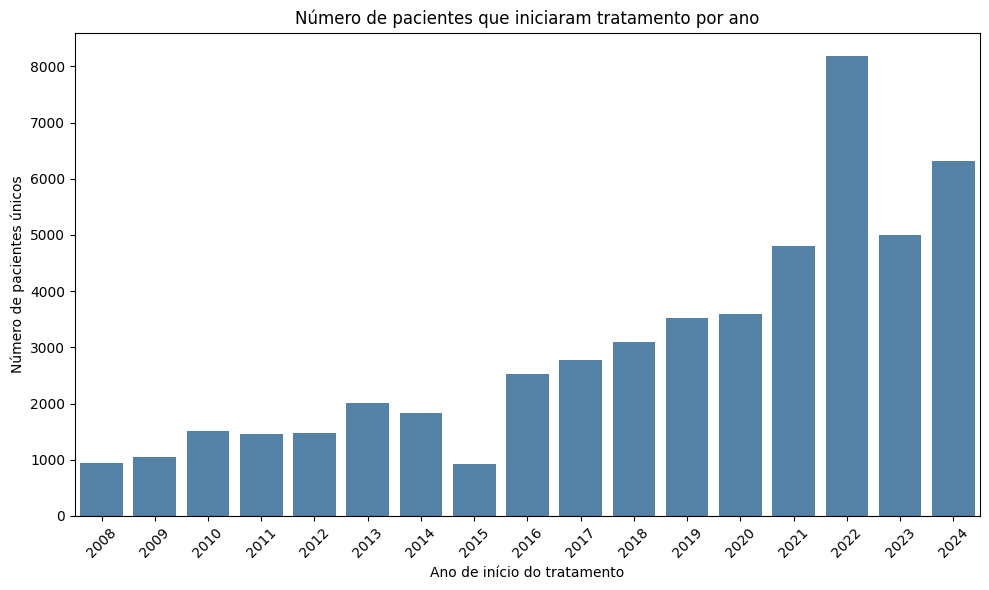

In [5]:
# Garantir que a coluna INICIO está como datetime
df['INICIO'] = pd.to_datetime(df['INICIO'], errors='coerce')

# Criar coluna com ano e converter para inteiro
df['ANO_INICIO'] = df['INICIO'].dt.year.astype('Int64')

# Agrupar e contar pacientes únicos
pacientes_por_ano = (
    df.groupby('ANO_INICIO')['AP_CNSPCN']
    .nunique()
    .reset_index(name='Pacientes_Iniciaram')
    .sort_values('ANO_INICIO')
)

# Plotar
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=pacientes_por_ano, x='ANO_INICIO', y='Pacientes_Iniciaram', color='steelblue')
plt.title('Número de pacientes que iniciaram tratamento por ano')
plt.xlabel('Ano de início do tratamento')
plt.ylabel('Número de pacientes únicos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Rafaela\AppData\Local\Temp\ipykernel_9812\2741142990.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['FIM'] = pd.to_datetime(df['FIM'], errors='coerce')


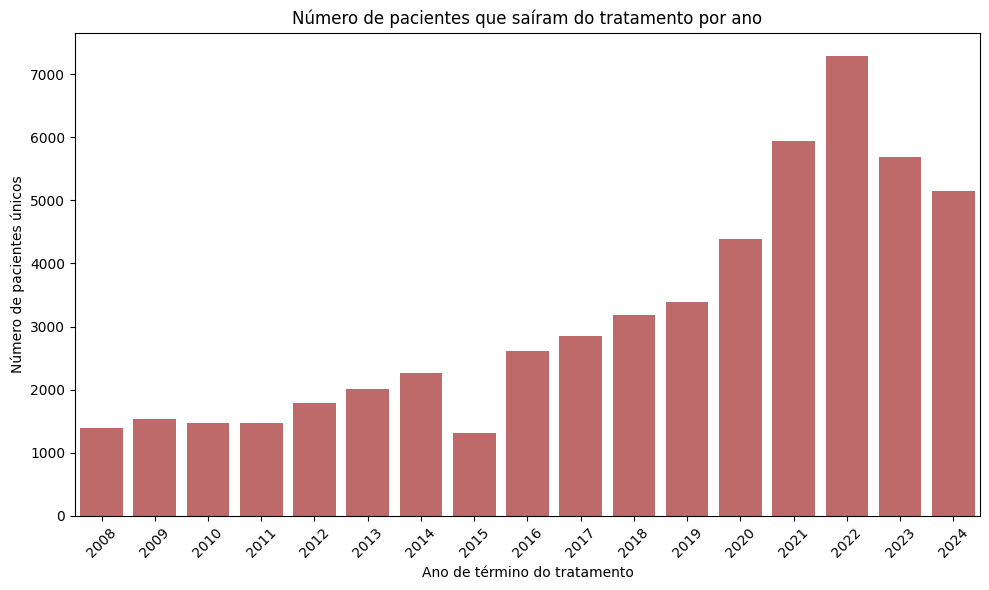

In [6]:
# 1. Garantir que a coluna 'FIM' é datetime
df['FIM'] = pd.to_datetime(df['FIM'], errors='coerce')

# 2. Extrair o ano e converter para inteiro
df['ANO_FIM'] = df['FIM'].dt.year.astype('Int64')

# 3. Agrupar e contar pacientes únicos
pacientes_saida = (
    df.groupby('ANO_FIM')['AP_CNSPCN']
    .nunique()
    .reset_index(name='Pacientes_Saíram')
    .sort_values('ANO_FIM')
)

# 4. Visualizar com gráfico
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=pacientes_saida, x='ANO_FIM', y='Pacientes_Saíram', color='indianred')
plt.title('Número de pacientes que saíram do tratamento por ano')
plt.xlabel('Ano de término do tratamento')
plt.ylabel('Número de pacientes únicos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


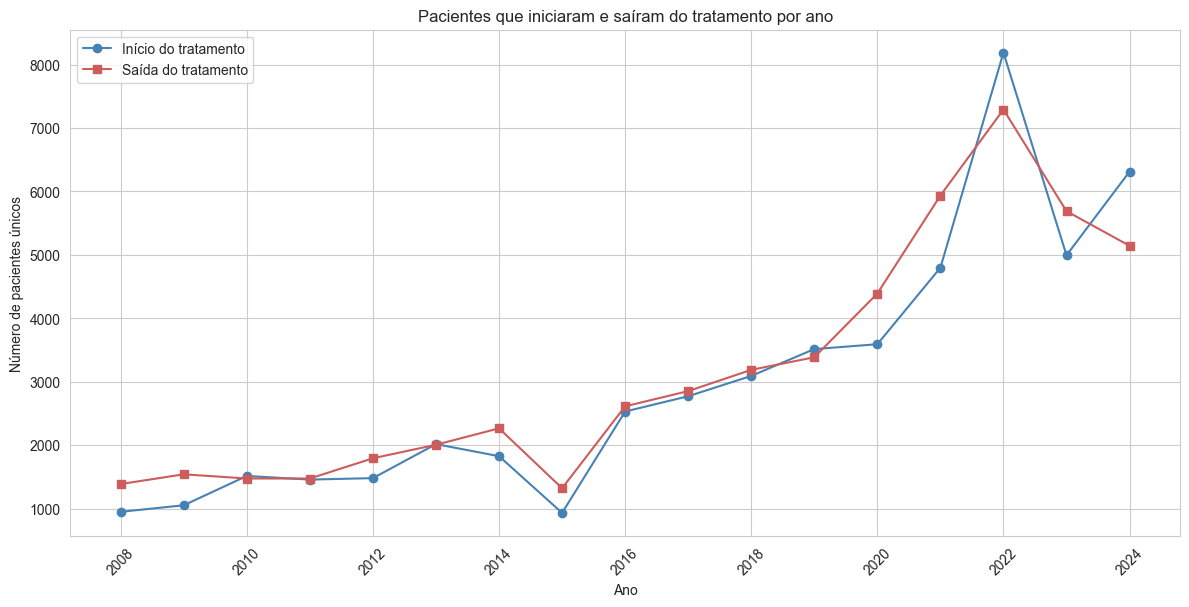

In [12]:
# Unir os dois DataFrames pela coluna do ano
df_entrada_saida = pd.merge(
    pacientes_por_ano,
    pacientes_saida,
    left_on='ANO_INICIO',
    right_on='ANO_FIM',
    how='outer'
).rename(columns={'ANO_INICIO': 'Ano'})

# Corrigir colunas para não terem NaN (preencher com zero)
df_entrada_saida['Ano'] = df_entrada_saida['Ano'].fillna(df_entrada_saida['ANO_FIM'])
df_entrada_saida = df_entrada_saida.drop(columns=['ANO_FIM'])
df_entrada_saida = df_entrada_saida.sort_values('Ano')
df_entrada_saida = df_entrada_saida.fillna(0)

# Converter ano para inteiro
df_entrada_saida['Ano'] = df_entrada_saida['Ano'].astype('Int64')

# Plotar as curvas
plt.figure(figsize=(12, 6))
plt.plot(df_entrada_saida['Ano'], df_entrada_saida['Pacientes_Iniciaram'], marker='o', label='Início do tratamento', color='steelblue')
plt.plot(df_entrada_saida['Ano'], df_entrada_saida['Pacientes_Saíram'], marker='s', label='Saída do tratamento', color='indianred')

plt.title('Pacientes que iniciaram e saíram do tratamento por ano')
plt.xlabel('Ano')
plt.ylabel('Número de pacientes únicos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

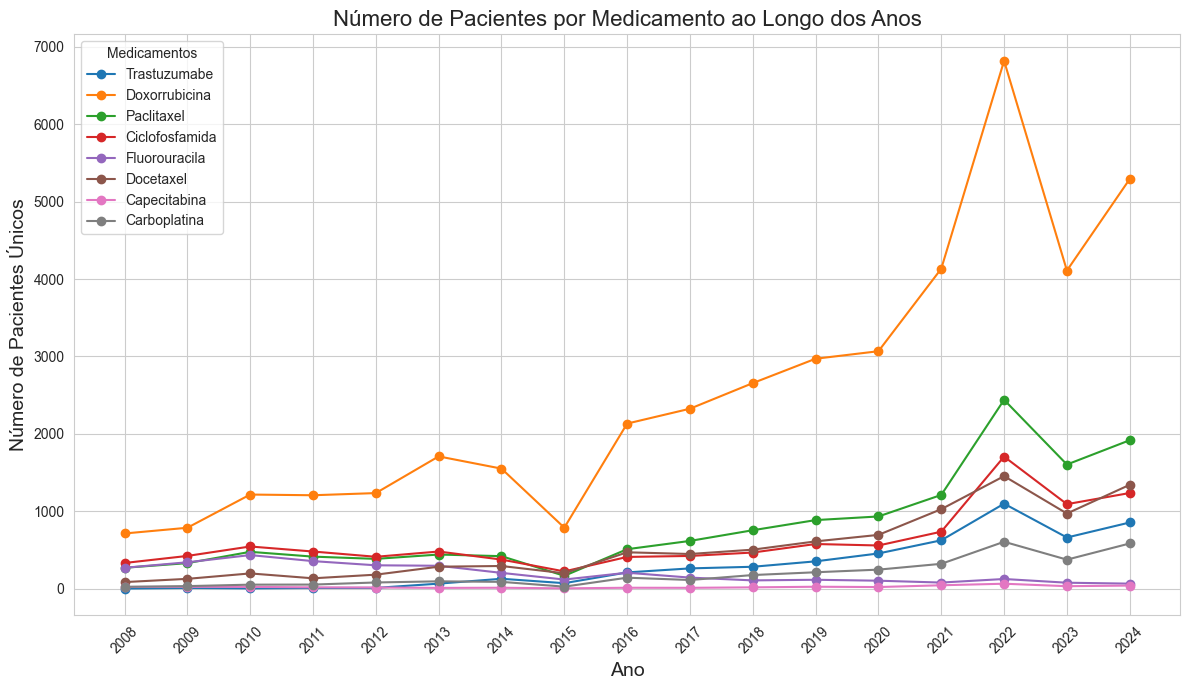

In [ ]:

# Extrair o ano da data de início
df['ANO'] = df['INICIO'].dt.year

# Lista de medicamentos que você quer analisar
medicamentos = [
    'TRASTUZUMABE', 'DOXORRUBICINA', 'PACLITAXEL', 'CICLOFOSFAMIDA',
    'FLUOROURACILA', 'DOCETAXEL', 'CAPECITABINA', 'CARBOPLATINA'
]

# Inicializar dicionário para armazenar resultados
dados_medicamentos = {}

# Para cada medicamento, contar pacientes únicos por ano
for med in medicamentos:
    df_temp = df[df[med] == 1]
    contagem = df_temp.groupby('ANO')['AP_CNSPCN'].nunique()
    dados_medicamentos[med] = contagem

# Criar DataFrame final
df_meds_ano = pd.DataFrame(dados_medicamentos).fillna(0).astype(int)

# Configurar estilo do gráfico
sns.set_style('whitegrid')

# Converte o índice para inteiro, se ainda não fez
df_meds_ano.index = df_meds_ano.index.astype(int)

# Criar figura e eixo
plt.figure(figsize=(12, 7))

# Plotar linha para cada medicamento
for med in df_meds_ano.columns:
    plt.plot(df_meds_ano.index, df_meds_ano[med], marker='o', label=med.title())

# Títulos e legendas
plt.title('Número de Pacientes que Iniciaram por Medicamento ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Número de Pacientes Únicos', fontsize=14)
plt.legend(title='Medicamentos')
plt.xticks(df_meds_ano.index, rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()

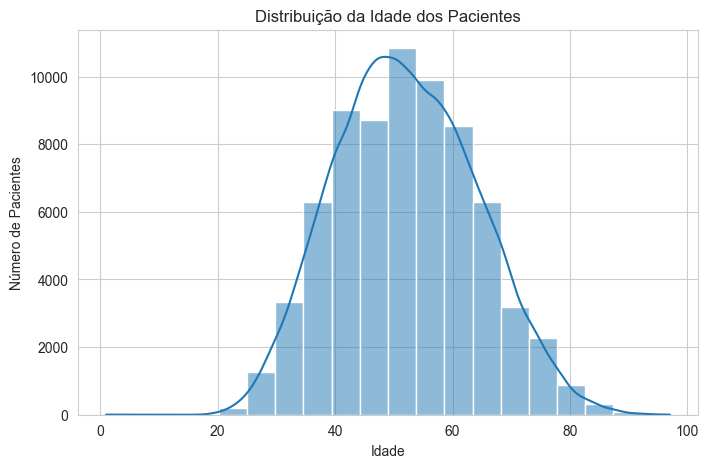

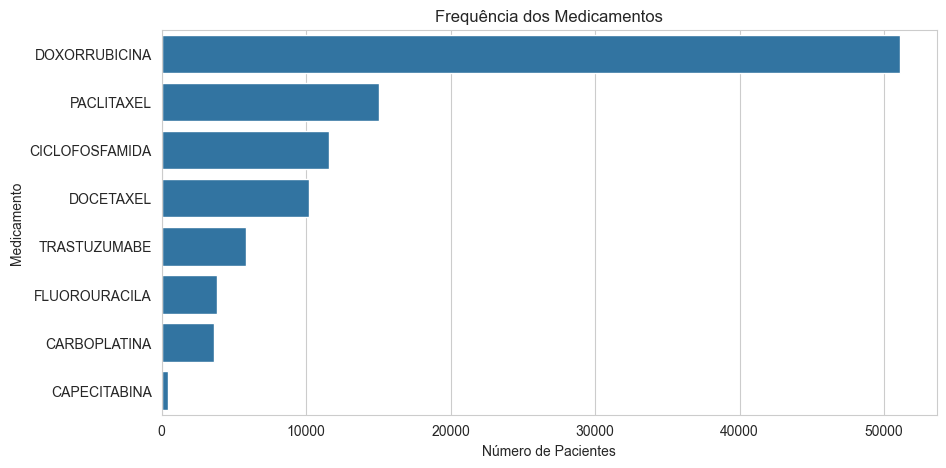

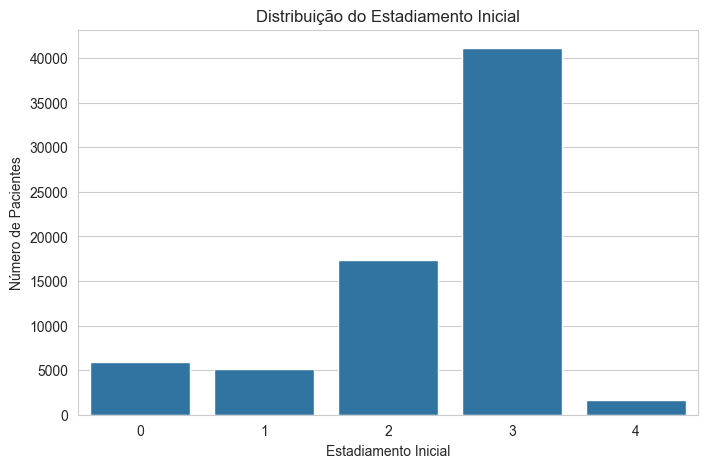

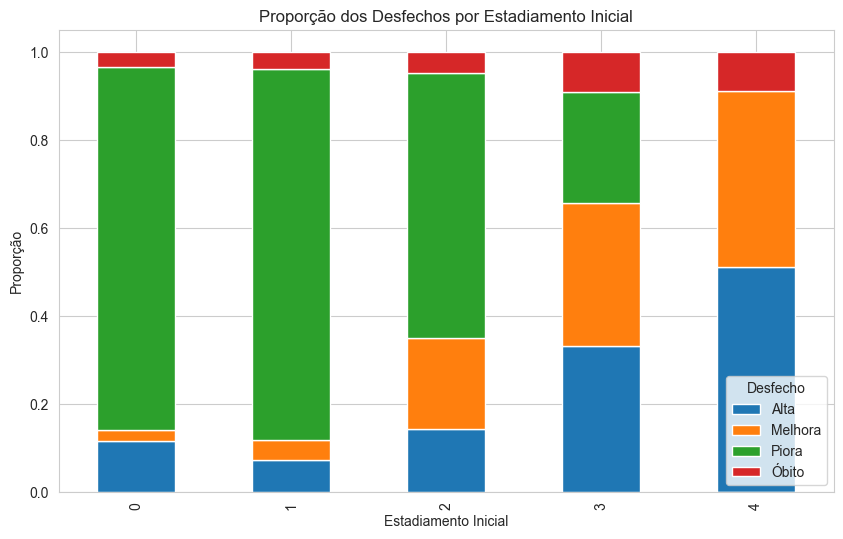

<Figure size 1200x600 with 0 Axes>

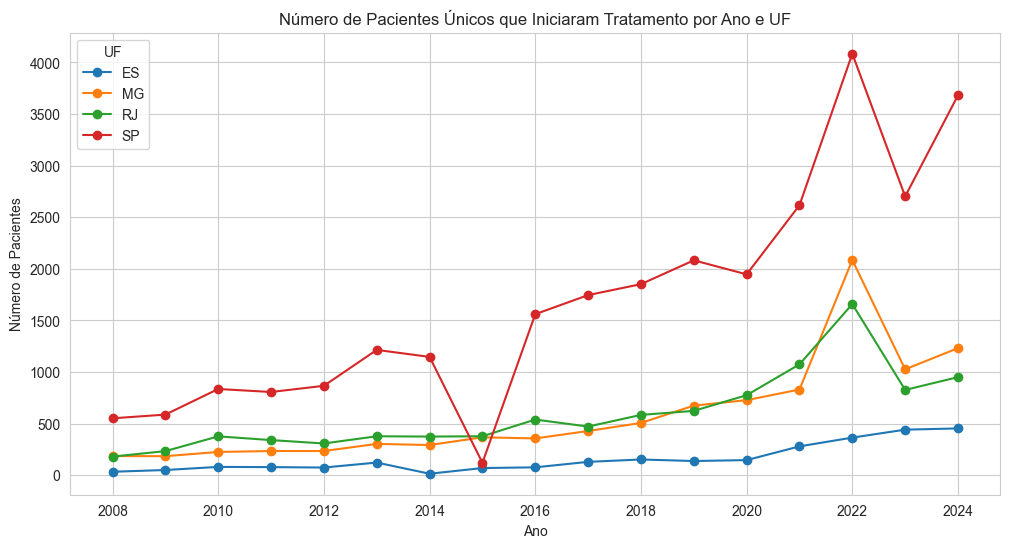

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Exemplo: garantir datas no formato datetime
df['INICIO'] = pd.to_datetime(df['INICIO'], errors='coerce')
df['FIM'] = pd.to_datetime(df['FIM'], errors='coerce')

# 1. Distribuição Demográfica - Idade
plt.figure(figsize=(8,5))
sns.histplot(df['AP_NUIDADE'], bins=20, kde=True)
plt.title('Distribuição da Idade dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Número de Pacientes')
plt.show()


# Frequência dos principais medicamentos
medicamentos = ['TRASTUZUMABE', 'DOXORRUBICINA', 'PACLITAXEL', 'CICLOFOSFAMIDA', 'FLUOROURACILA', 'DOCETAXEL', 'CAPECITABINA', 'CARBOPLATINA']

freq_meds = df[medicamentos].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=freq_meds.values, y=freq_meds.index)
plt.title('Frequência dos Medicamentos')
plt.xlabel('Número de Pacientes')
plt.ylabel('Medicamento')
plt.show()

# 4. Estadiamento do Câncer
plt.figure(figsize=(8,5))
sns.countplot(x='ESTADIAMENTO_INICIO', data=df, order=sorted(df['ESTADIAMENTO_INICIO'].dropna().unique()))
plt.title('Distribuição do Estadiamento Inicial')
plt.xlabel('Estadiamento Inicial')
plt.ylabel('Número de Pacientes')
plt.show()

# 5. Desfecho clínico por estadiamento inicial
desfecho_estad = pd.crosstab(df['ESTADIAMENTO_INICIO'], df['DESFECHO'], normalize='index')
desfecho_estad.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Proporção dos Desfechos por Estadiamento Inicial')
plt.xlabel('Estadiamento Inicial')
plt.ylabel('Proporção')
plt.legend(title='Desfecho')
plt.show()

# 6. Número de pacientes iniciando tratamento por ano e por UF (Unidade Federativa)
plt.figure(figsize=(12,6))
inicio_uf = df.groupby([df['INICIO'].dt.year, 'AP_UFMUN'])['AP_CNSPCN'].nunique().unstack()
inicio_uf.plot(kind='line', marker='o', figsize=(12,6))
plt.title('Número de Pacientes Únicos que Iniciaram Tratamento por Ano e UF')
plt.xlabel('Ano')
plt.ylabel('Número de Pacientes')
plt.legend(title='UF')
plt.show()




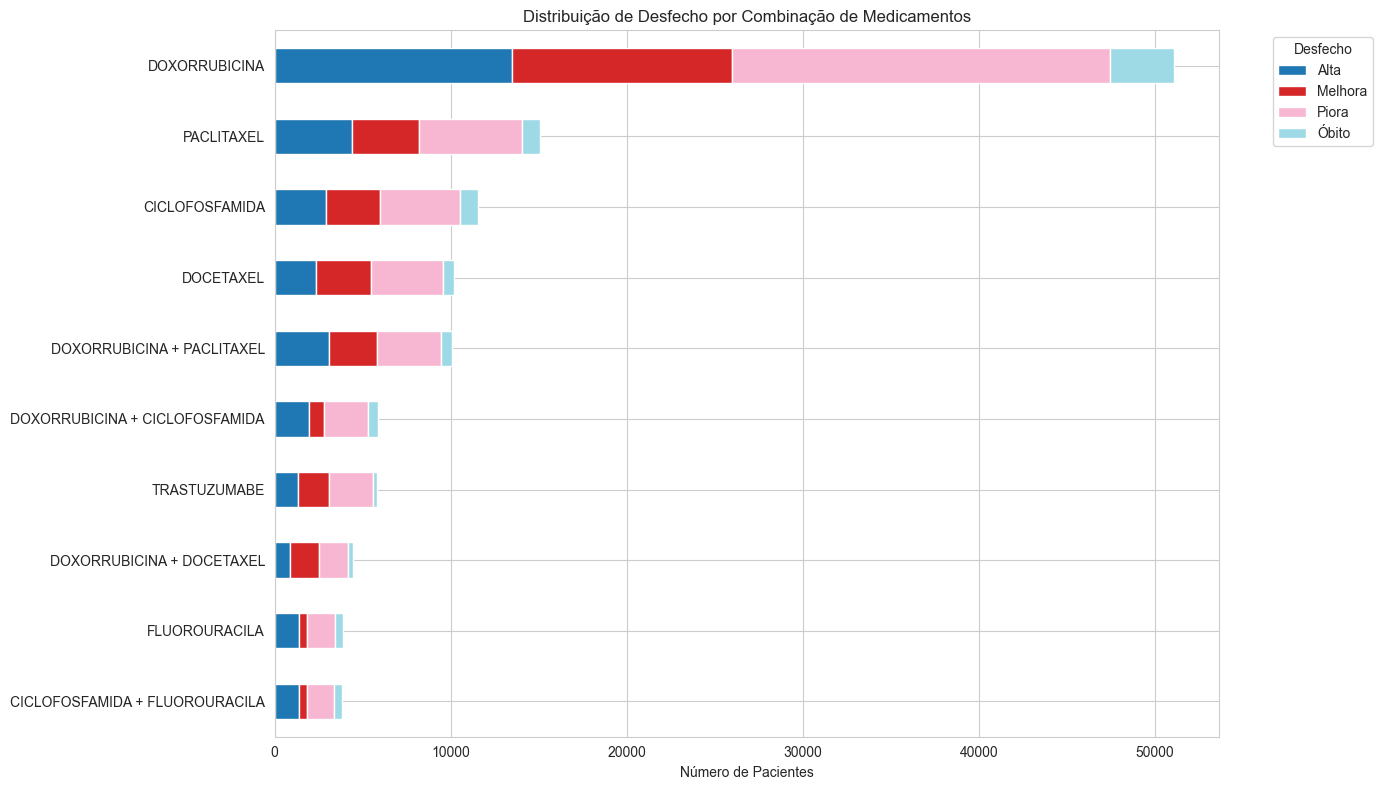

In [24]:
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import pandas as pd

meds = ['TRASTUZUMABE', 'DOXORRUBICINA', 'PACLITAXEL', 'CICLOFOSFAMIDA',
        'FLUOROURACILA', 'DOCETAXEL', 'CAPECITABINA', 'CARBOPLATINA',
        'METOTREXATO', 'LETROZOL']

min_comb = 1
max_comb = 4

def combinacoes_usadas(row):
    usados = [med for med in meds if row[med] > 0]
    combs = []
    for r in range(min_comb, min(max_comb, len(usados)) + 1):
        combs.extend(combinations(usados, r))
    return combs

df['combs'] = df.apply(combinacoes_usadas, axis=1)

df_exp = df.explode('combs').dropna(subset=['combs'])

contagem_combs = Counter(df_exp['combs'])

top_10_combs = [c[0] for c in contagem_combs.most_common(10)]

df_top = df_exp[df_exp['combs'].isin(top_10_combs)]

dist_desfecho = (
    df_top.groupby(['combs', 'DESFECHO'])
    .size()
    .unstack(fill_value=0)
)

dist_desfecho['total'] = dist_desfecho.sum(axis=1)
dist_desfecho = dist_desfecho.sort_values('total', ascending=True)
dist_desfecho = dist_desfecho.drop(columns='total')

dist_desfecho.index = [' + '.join(c) for c in dist_desfecho.index]

dist_desfecho.plot(kind='barh', stacked=True, figsize=(14,8), colormap='tab20')

plt.xlabel('Número de Pacientes')
plt.title(f'Distribuição de Desfecho por Combinação de Medicamentos')
plt.legend(title='Desfecho', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
